# (Effects of some variables on Loan Status)

## by (Maha Ahmed)

## Investigation Overview

> In this investigation, I wanted to look at some variables  of loans that could be used to predict their Status whether Completed ,current , chargedoff ,etc. The main focus was on the  ListingCategory ,IncomeRange, loan term ,  Employment Status , original loan amount, BorrowerAPR, borrowerRate and stated monthly income.

## Dataset Overview

> The dataset consisted of Loan Status and attributes of 113,937 loans. The attributes included  ListingCategory ,IncomeRange, loan term ,  Employment Status , original loan amount , and much more with 81 variables. 2280 data points were removed from the analysis due to missing values ,25 values removed from BorrowerAPR and 2255 from EmploymentStatus .

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

In [2]:
# load in the dataset into a pandas dataframe, print statistics
mf=pd.read_csv('prosperLoanData.csv')
pd.set_option('display.max_columns', None)

In [3]:
# take a copy of origenal data to do our analysis
df=mf.copy()

# I have select 11 variable to exploration from the dataset
s=['LoanStatus','Term','BorrowerAPR','BorrowerRate','ListingCategory (numeric)','IncomeRange','LoanOriginalAmount','IncomeVerifiable','EmploymentStatus','StatedMonthlyIncome']
df=pd.DataFrame(mf,columns=s)
df=df.round(2)

# ordered list of unique values in Term
terms = list(df.Term.unique())
terms.sort()
# convert data type of Term to (ordered) category
loan_terms = pd.api.types.CategoricalDtype(ordered = True, categories = terms)
df.Term = df.Term.astype(loan_terms)

# replace the feature of [ListingCategory (numeric)] to its describtion 
df['ListingCategory (numeric)'].replace(to_replace=[0,1,2,3,4,5,6,7,8, 9, 10,11,12,13,14,15,16,17,18,19,20],value=['Not Available','Debt Consolidation','Home Improvement','Business','Personal Loan','Student Use','Auto','Other','Baby&Adoption','Boat','Cosmetic Procedure','Engagement Ring','Green Loans','Household Expenses','Large Purchases','Medical/Dental','Motorcycle,','RV','Taxes','Vacation','Wedding Loans'],inplace=True)
df.rename(columns = {'ListingCategory (numeric)':'ListingCategory'}, inplace = True)


## (Distribution of LoanStatus)

> Loan Status in the dataset have  variety of features like  `Current` with  about 56000 loan that not completed , `Completed` Status with 35000 loans , `Chargedoff`, `Defaulted` , `Past Due` Loans and etc.
Plotting a bar for loanStauts which  ia a categorical values, then a bar  chart for the first predictor variable of interest: `ListingCategory`

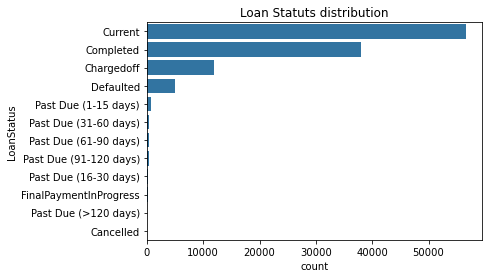

In [4]:
## Plot the LoanStatus on a Horizontal bar chart
base_color = sb.color_palette()[0]
LoanStatus_order = df['LoanStatus'].value_counts().index
sb.countplot(data=df, y='LoanStatus', color=base_color, order=LoanStatus_order)
plt.title('Loan Statuts distribution');

## (Distribution of ListingCategory)

> Interestingly, it looks like 51.2% of the borrowers asking for loan to  Dept consolidation and 14.9% are not available to know .

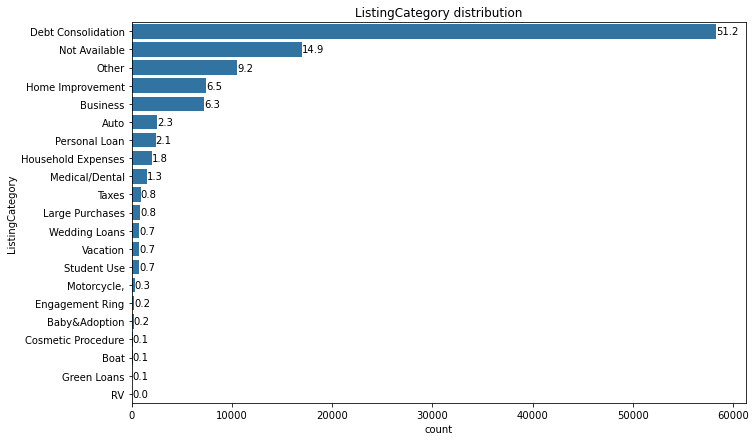

In [15]:
# Count the frequency of unique values in the `ListingCategory` column of df  dataframe. 
Listing_Category_counts = df['ListingCategory'].value_counts()

# Get the unique values of the `ListingCategory` column, in the decreasing order of the frequency.
ListingCategory_order=Listing_Category_counts.index

# Returns the sum of all not-null values in `ListingCategory ` column
df_ListingCategory = df['ListingCategory'].value_counts().sum()

# Return the highest frequency in the `ListingCategory ` column
max_Listing_Category_counts = Listing_Category_counts[0]

# Return the maximum proportion, or in other words, 
# compute the length of the longest bar in terms of the proportion
max_prop = max_Listing_Category_counts / df_ListingCategory

# Use numpy.arange() function to produce a set of evenly spaced proportioned values 
# between 0 and max_prop, with a step size 2\%
Listing_Category_props = np.arange(0, max_prop, 0.02)

# Plot the ListingCategory on a Horizontal bar chart
plt.figure(figsize = (11, 7))
base_color = sb.color_palette()[0]
sb.countplot(data=df, y='ListingCategory', color=base_color, order=ListingCategory_order);

# Logic to print the proportion text on the bars
for i in range (Listing_Category_counts.shape[0]):
    # Remember, type_counts contains the frequency of unique values in the `type` column in decreasing order.
    count = Listing_Category_counts[i]
    # Convert count into a percentage, and then into string
    pct_string = '{:0.1f}'.format(100*count/df_ListingCategory)
    # Print the string value on the bar. 
    plt.text(count+1, i, pct_string, va='center')
    plt.title('ListingCategory distribution');

## (Distribution of BorrowerAPR)

> The distribution of BorrowerAPR seem  to be symmetric,  A  highest peak is about 0.36 and A small peak centered at 0.05

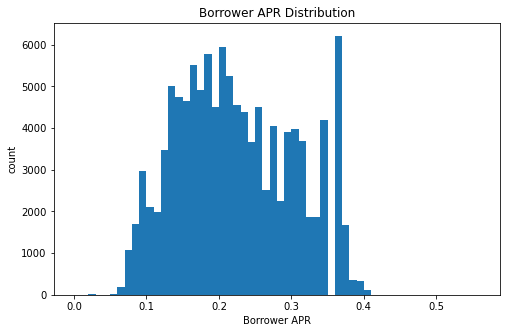

In [16]:
bins = np.arange(0, df.BorrowerAPR.max()+0.05, 0.01)
plt.figure(figsize=[8, 5])
plt.hist(data = df, x = 'BorrowerAPR', bins = bins);
plt.xlabel('Borrower APR')
plt.ylabel('count')
plt.title('Borrower APR Distribution');

C:\Users\20111\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


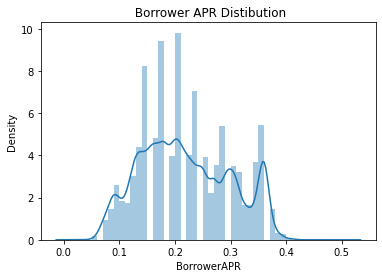

In [17]:
# Set the argument  to remove the estimate-line representing the Gaussian kernel density estimate.
sb.distplot(df['BorrowerAPR'])
plt.title(' Borrower APR Distibution');

## Distribution of LoanOriginalAmount
>The box plot of the original amount of loans suggested that the distribution is right-skewed with the center observed at approximately 7,000 However, the histogram did not show a gradual decrease in the observed frequency with increasing amount of loans. For instance, the observed frequencies for the fifth and the eighth bins were larger than two times the frequencies of the fourth and seventh bins

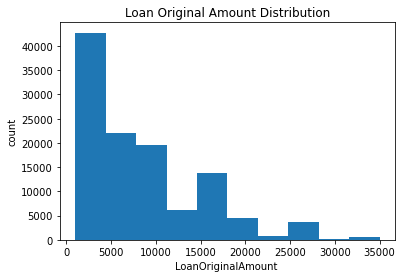

In [18]:
# Create bins with step-size 10
plt.hist(data = df, x = 'LoanOriginalAmount', bins = 10)
plt.xlabel('Loan Original Amount USD ')
plt.ylabel('count')
plt.title('Loan Original Amount Distribution');

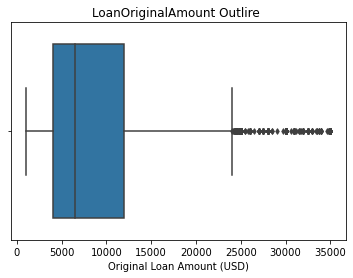

In [22]:
# second of two subplots arranged in 1-by-2
sb.boxplot(data = df, x = 'LoanOriginalAmount', fliersize = 4) # box plot of loan amounts
plt.xlabel('Original Loan Amount (USD)')
plt.xlabel('Original Loan Amount (USD)')
plt.title('LoanOriginalAmount Outlire ');

## (LoanStauts vs BorrowerAPR)

> Current and completed loans have lower rate than the past-due loans and chargedoff
> Current have BorrowerAPR in range between 0.2 and 0.3
>completed have BorrowerAPR in range between 0.15 and 0.33

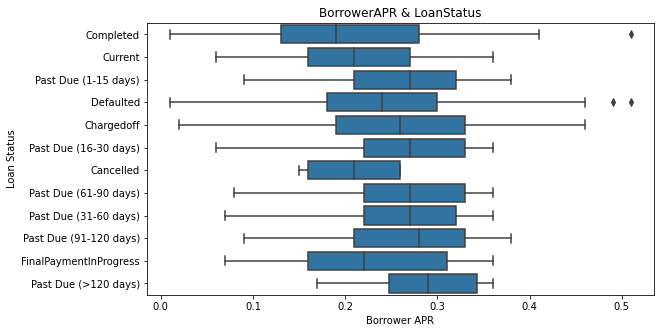

In [10]:
plt.figure(figsize = [20, 5])

plt.subplot(1, 2, 1)
sb.boxplot(data=df,x='BorrowerAPR',y='LoanStatus',color=base_color);
plt.xlabel('Borrower APR');
plt.ylabel('Loan Status');
plt.title('BorrowerAPR & LoanStatus');


## (LoanStatus vs. term)

> according to the  countplot 34800 of borrowers with three year Term have  almost  Completed the  Loans .
and 35400 of borrowers with Three years term was still paying the loan .

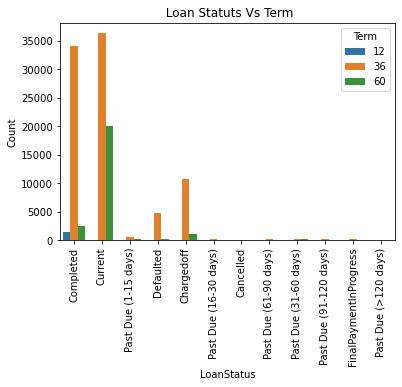

In [19]:
#plot the relationship between LoanStatus and term
sb.countplot(data = df, x = 'LoanStatus', hue = 'Term')
plt.xticks(rotation = 90)
plt.xlabel('LoanStatus')
plt.ylabel('Count')
plt.title(' Loan Statuts Vs Term');

## (LoanStatus vs. BorrowerRate by EmploymentStatus)
>>Past Due loans generally have higher interest rates in all employment statuses , there was no significant relationship between LoanStatus and employment statuses


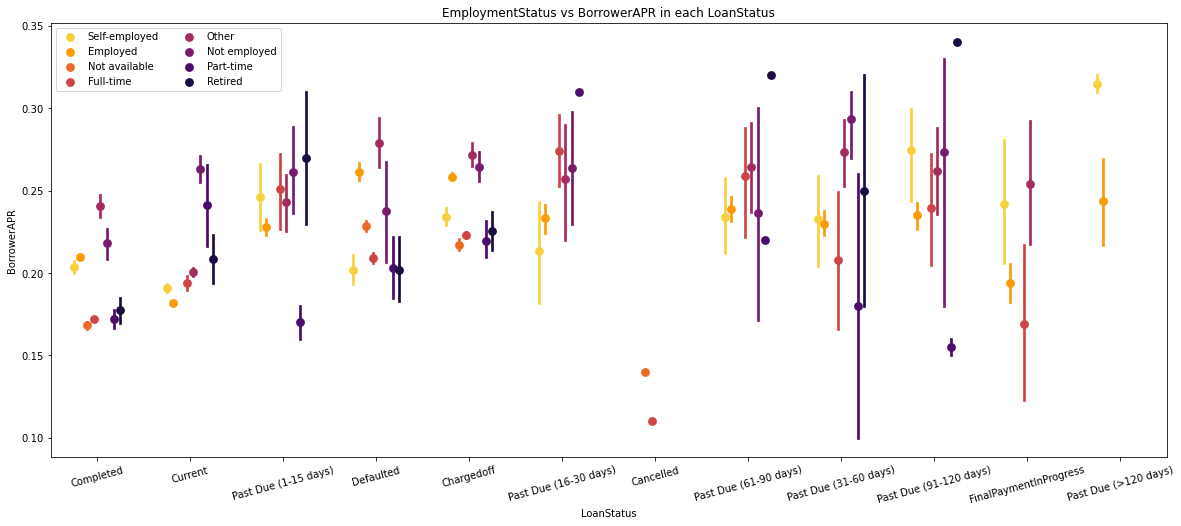

In [12]:
#plot the relationship between LoanStatus ,BorrowerAPR and EmploymentStatus
fig = plt.figure(figsize = [20,8])
ax = sb.pointplot(data = df, x = 'LoanStatus', y = 'BorrowerRate', hue = 'EmploymentStatus', linestyles = "",
                  dodge = 0.5, palette = 'inferno_r')
plt.title('EmploymentStatus vs BorrowerAPR in each LoanStatus')
plt.ylabel('BorrowerAPR')
plt.xticks(rotation=15)
plt.legend(ncol=2)
plt.show();

## (LoanStatus vs LoanOriginalAmount, BorrowerRate,BorrowerAPR and StatedMonthlyIncome)

>Based on the plot as was showed previously the negative relationship between LoanStauts,BorrowerRate , LoanOriginalAmont And BorrowerRate and no significant  relationship between StatedMonthlyIncome

<Figure size 1656x1152 with 0 Axes>

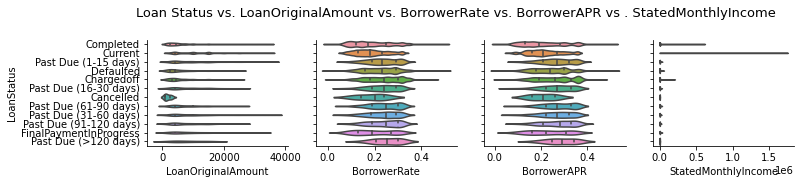

In [23]:
#plot the relationship between LoanStatus ,LoanOriginalAmount, BorrowerRate,BorrowerAPR and StatedMonthlyIncome
plt.figure(figsize = [23, 16])
g = sb.PairGrid(data = df, x_vars = ['LoanOriginalAmount', 'BorrowerRate','BorrowerAPR','StatedMonthlyIncome'],
                y_vars = ['LoanStatus'])
g.map(sb.violinplot, inner = 'quartile')
g.fig.subplots_adjust(top=0.80)
g.fig.suptitle("Loan Status vs. LoanOriginalAmount vs. BorrowerRate vs. BorrowerAPR vs . StatedMonthlyIncome ", fontsize=13);

In [24]:
!jupyter nbconvert slide_deck_tempalet.ipynb --no-input --to slides

[NbConvertApp] Converting notebook slide_deck_tempalet.ipynb to slides
[NbConvertApp] Writing 874816 bytes to slide_deck_tempalet.slides.html
